## Implementación del algoritmo de regresión lógistica para problemas de clasificación

La única diferencia entre una regresión lineal y una regresión lógistica es la hipótesis. En regresión lógistica se usa la función logística o sigmoide:  1/(1+e**-z). Vamos a representar con matplotlib dicha función:

In [2]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
from matplotlib import pyplot as plt

import math
import numpy as np
import random
import sys
import pandas as pd


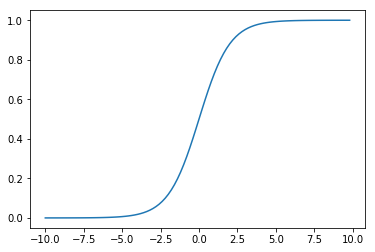

In [3]:
def sigmoid(x):
    a = []
    for z in x:
        a.append(1/(1+math.e**-z))
    return a

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10., 10., 0.2) #vector de valores entre -10 y 10, dando saltos de 0.2 en 0.2. La diferencia con range es que aquí si podemos obtener valores decimales. 
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()

Como vemos, esta función pasa por 0.5. Para valores positivos la función sigmoide nos dará un mayor a 0.5 y para valores negativos un valor mejor a 0.5.

El coeficiente z de la función sigmoide en regresión logistica se corresponde con la hipótesis de la regresión lineal. Por tanto nuestro algoritmo buscará los coeficientes de un hiperplano que proporcione valores negativos para una clase y valores positivos para otra.

In [4]:
data = pd.DataFrame(data={"Tamaño": [4, 5, 7, 8, 9, 15, 16, 22, 25, 26],
                          "Tumor": [0, 0, 0 ,0 , 0, 1, 1, 1 ,1 ,1] })  #siempre hay que categorizar los datos origen

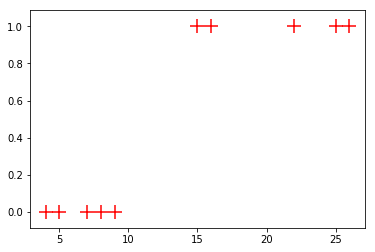

In [5]:
X = data.Tamaño
y = data.Tumor
plt.scatter(X, y, marker='+', color='r', s=200)

Podemos diferenciar las dos clases con diferentes marcadores:

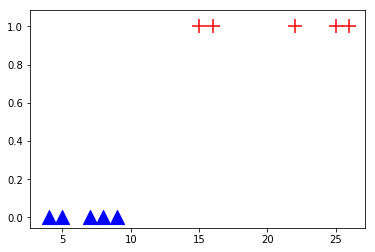

In [6]:
plt.scatter(data.Tamaño[data.Tumor == 1], data.Tumor[data.Tumor == 1], marker='+', color='r', s=200) #marker es para que cada una de las clases me las pinte con un color diferente
plt.scatter(data.Tamaño[data.Tumor == 0], data.Tumor[data.Tumor == 0], marker='^', color='b', s=200)

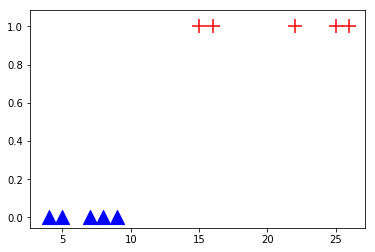

In [7]:
import seaborn #unicamente importando esto ya nos va a modificar la apariencia del grafico
plt.scatter(data.Tamaño[data.Tumor == 1], data.Tumor[data.Tumor == 1], marker='+', color='r', s=200)
plt.scatter(data.Tamaño[data.Tumor == 0], data.Tumor[data.Tumor == 0], marker='^', color='b', s=200)

La implementación de la regresión lógistica es exactamente igual que la regresión lineal. Unicamente tenemos que modificar la hipótesis:

/Users/YiselWindows/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Mejora: 88.300128 ([0.9313229408006884, -0.9087691803102385])
Mejora: 19.790136 ([0.5027895903821136, -1.1802433558023686])
Mejora: 10.007287 ([0.37113775942548255, -0.8693354523556227])
Mejora: 0.115580 ([0.08549981729234934, -0.30805955837387167])
Mejora: 0.092119 ([0.011566879762355153, 0.4310533063420219])
Mejora: 0.078128 ([0.01790951978486377, 0.37037711510525995])
Mejora: 0.043760 ([0.08009504653043087, -0.5209992144057423])
Mejora: 0.035951 ([0.05032626780557248, -0.04403966895154876])


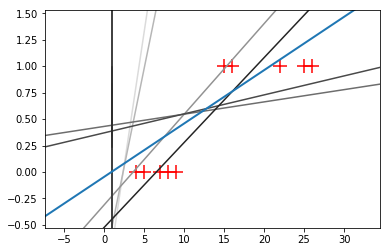

In [8]:
import numpy as np
import random
import sys

#hay que utilizar la hipotesis de la reg. lineal para implementar la reg.logistica

#metodo protegido: solo pueden acceder metodos de la misma clase y aquellas clases que sean hijas

class BaseRegresionLineal:
    
    def __init__(self, learning_rate=100, fit_intercept=False):
        '''
        Inicialización del modelo.
        Parametros:
          - learning_rate: define el desplazamiento máximo sobre los pesos en cada iteración.
        '''
        self.learning_rate = learning_rate
        self.fit_intercept = fit_intercept
        self.w = None
        self.num_attr = None
       
    def _HRL(self, X, w):
        '''
        Establece la hipótesis de la regresión lineal. Devuelve la evaluación de dicha hipótesis.
        '''
        if len(X.shape) > 1:
            return np.sum(X*np.array(w), axis=1)
        else:
            return X*np.array(w)
        
    def _H(self, X, w):
        return self._HRL(X, w)

    def _J(self, X, Y, w):
        '''
        Establece la función de coste y devuelve la evaluación de dicha función de coste
        '''
        return (0.5 / X.shape[0]) * sum((self._H(X, w) - y) ** 2)
    
    def _update(self, X, y, current_w):
        raise Exception("Not implemented")

    def fit(self, X, y, num_iter=100, verbose=True, plot=False):
        '''
        Lleva a cabo la búsqueda de los mejores pesos dado los datos de entrada X y la 
        variable respuesta y.
        Parámetros:
          - X: datos de entrada en formato de tabla. Cada fila corresponde a una muestra y cada columna a un atributo.
          - y: variable de respuesta. Debe contener tantos elementos como filas tiene la entrada.
          - num_iter: número de iteraciones que queremos ejecutar de algoritmo de búsqueda.
          - verbose: si es True imprimirá por pantalla mensajes sobre el progreso
          - plot: si es True mostrará un gráfico de la línea de regresión. Solo en el caso de tener un solo atributo.
        '''
        
        # Comprobamos que el número de filas de la entrada corresponde con el número 
        # de elementos de la variable de respuesta
        if len(X) != len(y):
            raise Exception("El número de filas de X y el número de elemento en y no se corresponden.")

        if type(X) is pd.DataFrame:
            X = X.values
        
        if len(X.shape) == 1:
            X = X.reshape(X.shape[0],1)

        # Si se quiere ajustar la intercepción debemos introducir un nuevo atributo ficticio
        if self.fit_intercept:
            X = np.hstack((X, np.array([1.] * X.shape[0]).reshape(X.shape[0],1)))
        
            
        # Usaremos esta lista para guardar el progreso del ajuste
        self.history = []

        # Establecemos el valor del coste al inicio lo mayor posible    
        j_min = float("inf")
        
        # Inicializamos los pesos
        self.num_attr = 1 if len(X.shape) == 1 else X.shape[1]
        self.w = [.0] * self.num_attr
        current_w = [.0] * self.num_attr
            
        
        for it in range(0,num_iter):
            # actualizamos los pesos aplicando el desfase de los pesos
            current_w = self._update(X, y, current_w)
            
            # calculamos el coste con los nuevos pesos
            j = self._J(X, y, current_w)

            # si encontramos mejora, actualizamos el los pesos del modelo y guardamos 
            # la mejora en el histórico
            if j < j_min:
                if verbose:
                    print ("Mejora: %f (%s)" % (j, current_w))
                    
                j_min = j
                self.w = current_w[:]
                self.history.append(current_w[:])

        # si se ha pedido mostrar el gráfico del progreso y tenemos un solo atributo 
        # pintamos las rectas encontradas      
        if plot and (self.num_attr == 1 or self.num_attr == 2 and self.fit_intercept):
            axes = plt.gca()
            axes.set_ylim([min(0, y.min() - y.std()), y.max() + y.std()])
            axes.set_xlim([min(0, X.min() - X.std()), X.max() + X.std()])
            
            for i, w in enumerate(self.history[:-1]):
                X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
                if self.fit_intercept:
                    X_plot = np.hstack((X_plot.reshape(X_plot.shape[0],1), 
                                        np.array([1.] * X_plot.shape[0]).reshape(X_plot.shape[0],1)))
                    
                gray = 1-i/(len(self.history)-1)
                plt.plot(X_plot, self._HRL(X_plot, w), '-', color=str(gray))


            # Add correlation line
            X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
            X_hip = X_plot
            if self.fit_intercept:
                X_hip = np.hstack((X_plot.reshape(X_plot.shape[0],1), 
                                    np.array([1.] * X_plot.shape[0]).reshape(X_plot.shape[0],1)))

            
            plt.plot(X_plot, self._HRL(X_hip, self.w), '-', linewidth=2)
            
            if self.fit_intercept:
                plt.scatter(X[:, :-1], y, marker='+', color='r', s=200)
            else:
                plt.scatter(X, y, marker='+', color='r', s=200)

            
            #plt.show()
            
    def predict(self, X):
        '''
        Realiza la predicción para los datos de entrada X
        '''
        if self.w is None:
            raise Exception("El modelo no ha sido ajustado")
            
        return self._H(X, self.w)
    
class BaseRegresionLogistica(BaseRegresionLineal):
    
        def _H(self, X, w):
            '''
            Establece la hipótesis de la regresión lineal. Devuelve la evaluación de dicha hipótesis.
            '''
            if len(X.shape) > 1:
                return np.sum(X*np.array(w), axis=1)
            else:
                return X*np.array(w)
            
class RandomRegresionLogistica(BaseRegresionLogistica):
    
    def _update(self, X, y, current_w):
        for iattr in range(self.num_attr):
            current_w[iattr] = self.w[iattr] + random.uniform(-self.learning_rate,self.learning_rate)
        
        return current_w
    
reg = RandomRegresionLogistica(learning_rate=1, fit_intercept=True)
reg.fit(data.Tamaño, data.Tumor, num_iter=1000, plot=True)

/Users/YiselWindows/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Mejora: 0.123713 ([0.03835367863440953, 0.0035533225628744114])
Mejora: 0.120640 ([0.12963282711637472, -0.09039797193232094])
Mejora: 0.120260 ([0.14223277811731377, -0.03343591884123698])
Mejora: 0.118355 ([0.20767646691511038, -0.011553686991430528])
Mejora: 0.116612 ([0.28077568417089294, 0.021687622015992447])
Mejora: 0.116263 ([0.2876843397402905, 0.0064417112189952275])
Mejora: 0.114622 ([0.3537314028895139, 0.011085973357655654])
Mejora: 0.112349 ([0.4050696490126897, -0.0729023366034704])
Mejora: 0.111885 ([0.4775839973102157, 0.017297638045368713])
Mejora: 0.110456 ([0.5072449840416529, -0.028313874052213986])
Mejora: 0.110397 ([0.48101509338188625, -0.07479128347937715])
Mejora: 0.108118 ([0.5510615793855543, -0.12231489101165449])
Mejora: 0.105750 ([0.6192126158190239, -0.186186583105114])
Mejora: 0.105680 ([0.6057975048159273, -0.2398731900341631])
Mejora: 0.104399 ([0.6409900833024003, -0.3213689947964749])
Mejora: 0.103337 ([0.6763131452414977, -0.37270201123667834])
Mej

Mejora: 0.003310 ([14.903793115411288, -6.904384693030747])
Mejora: 0.003290 ([14.956775743124544, -6.871425692826106])
Mejora: 0.003271 ([14.957529731514452, -6.95351987967636])
Mejora: 0.003240 ([14.998829714083515, -6.950759357421928])
Mejora: 0.003200 ([15.053831940015913, -6.972395504011783])
Mejora: 0.003195 ([15.069422607776772, -7.0253968548631285])
Mejora: 0.003166 ([15.142977739346124, -6.938311668705918])
Mejora: 0.003136 ([15.143524604046005, -7.0304876382568295])
Mejora: 0.003118 ([15.200970957831156, -6.9747932369116805])
Mejora: 0.003116 ([15.180637264370057, -6.999500940591241])
Mejora: 0.003060 ([15.253352260471656, -7.054600276825128])
Mejora: 0.003008 ([15.327519859852659, -7.1129938018553585])
Mejora: 0.002979 ([15.369738670791602, -7.119989308082445])
Mejora: 0.002969 ([15.415846555940163, -7.216764412571845])
Mejora: 0.002899 ([15.499620733455984, -7.223889218184333])
Mejora: 0.002894 ([15.497569320555542, -7.174755306144706])
Mejora: 0.002860 ([15.550513589749833

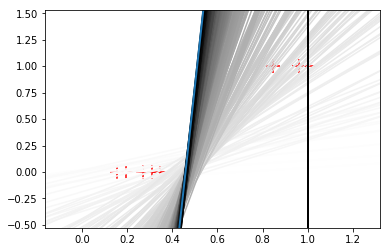

In [9]:
class BaseRegresionLogistica(BaseRegresionLineal):
    
    def _H(self, X, w):
        '''
        Establece la hipótesis de la regresión lineal. Devuelve la evaluación de dicha hipótesis.
        '''
        z = super(BaseRegresionLogistica, self)._H(X, w)
        return 1/(1+math.e**-z) #aplico sigmoide

class RandomRegresionLogistica(BaseRegresionLogistica):
    
    def _update(self, X, y, current_w): #queda implementar el sistema de actualizacion
        for iattr in range(self.num_attr):
            current_w[iattr] = self.w[iattr] + random.uniform(-self.learning_rate,self.learning_rate)
        
        return current_w
    
reg = RandomRegresionLogistica(learning_rate=0.1, fit_intercept=True)
reg.fit(data.Tamaño/data.Tamaño.max(), data.Tumor, num_iter=1000, plot=True)

Observando como la evolución del algoritmo vemos que buscar una recta entre ambas clases, de manera que todo lo que quede a un lado sera de un clase y lo que quede al otro será de otro.

## Ejercicio: aplicar el gradiente descendente a la regresión logística

/Users/YiselWindows/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Mejora: 0.255687 ([-0.34284870945620716, 0.3975832482389412])
Mejora: 0.091510 ([0.13510150225004147, -0.521880973725176])
Mejora: 0.047889 ([0.14290847014263863, -1.4940539079322397])
Mejora: 0.036876 ([0.1730430640946179, -2.002739201575621])
Mejora: 0.024217 ([0.2318799986215747, -2.993449871584466])
Mejora: 0.018117 ([0.30921163254067086, -3.4120125324680877])
Mejora: 0.015167 ([0.31228877952314105, -3.793100309037582])
Mejora: 0.011848 ([0.3543547063360768, -4.3070688217143855])
Mejora: 0.010374 ([0.38280472189763093, -4.506352474593592])
Mejora: 0.009040 ([0.4306259338075704, -4.842461956915922])
Mejora: 0.006330 ([0.4793194176221689, -5.520921297781882])
Mejora: 0.004158 ([0.5440132620029603, -6.361104549512346])
Mejora: 0.003288 ([0.5780736326841696, -7.095506376963142])
Mejora: 0.003000 ([0.5983007887516774, -7.02218232869352])
Mejora: 0.002372 ([0.6411316462340186, -7.502340651198778])
Mejora: 0.001543 ([0.7327679257592932, -8.459751918663992])
Mejora: 0.001542 ([0.7054944579

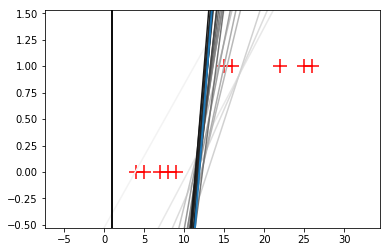

In [10]:
class GDRegresionLineal(BaseRegresionLogistica):
    
    def _update(self, X, y, current_w):
        for iattr in range(self.num_attr):
            current_w[iattr] = self.w[iattr] - (self.learning_rate * 
                            (np.dot(self._H(X, self.w) - y, X[:,iattr]) / X.shape[0]))

        return current_w
reg = RandomRegresionLogistica(learning_rate=1, fit_intercept=True)
reg.fit(data.Tamaño, data.Tumor, num_iter=1000, plot=True)